In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from   statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import Lasso, Ridge

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Auto%20Insurance%20-%20CustomerLifetimeValue/data.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
df.shape

(9134, 24)

In [4]:
df.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)
df['CLV']

0        2763.519279
1        6979.535903
2       12887.431650
3        7645.861827
4        2813.692575
            ...     
9129    23405.987980
9130     3096.511217
9131     8163.890428
9132     7524.442436
9133     2611.836866
Name: CLV, Length: 9134, dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
df["Customer"].count

<bound method Series.count of 0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: Customer, Length: 9134, dtype: object>

In [8]:
df["Number of Open Complaints"].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [9]:
df["Number of Open Complaints"].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: Number of Open Complaints, dtype: int64

In [10]:
df['Number of Open Complaints'] = df['Number of Open Complaints'].astype('object',copy=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
list(df.select_dtypes(exclude=['object']).columns)

['CLV',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Policies',
 'Total Claim Amount']

<AxesSubplot:xlabel='Income'>

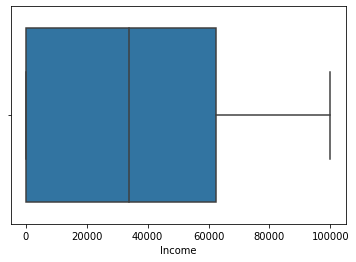

In [12]:
sns.boxplot(df['Income'])

<AxesSubplot:xlabel='Monthly Premium Auto'>

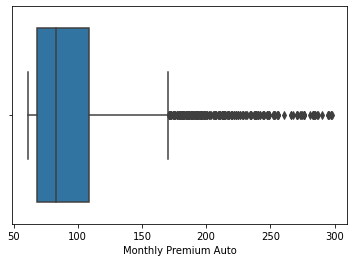

In [13]:
sns.boxplot(df['Monthly Premium Auto'])

<AxesSubplot:xlabel='Months Since Last Claim'>

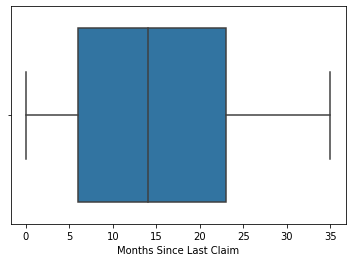

In [14]:
sns.boxplot(df['Months Since Last Claim'])

<AxesSubplot:xlabel='Months Since Policy Inception'>

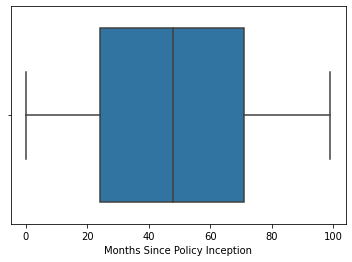

In [15]:
sns.boxplot(df['Months Since Policy Inception'])

<AxesSubplot:xlabel='Total Claim Amount'>

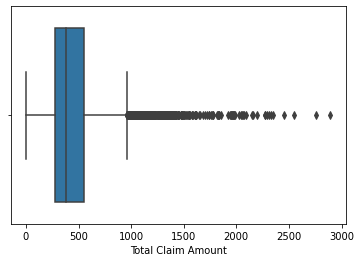

In [16]:
sns.boxplot(df['Total Claim Amount'])

In [17]:
df["Total Claim Amount"].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: Total Claim Amount, dtype: float64

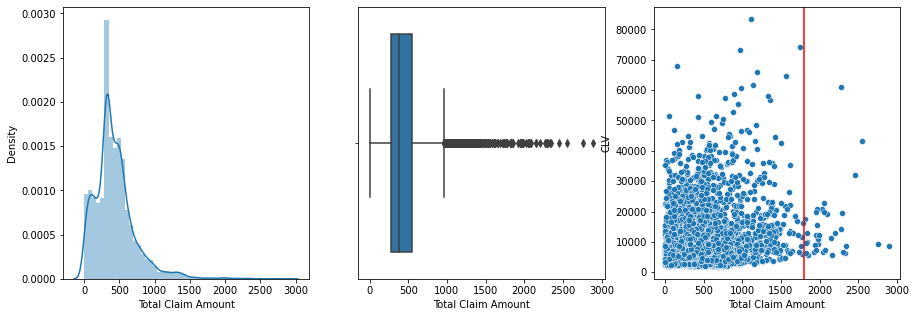

In [18]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['Total Claim Amount'],ax=ax[1])

sns.distplot(df['Total Claim Amount'],ax=ax[0])
sns.scatterplot(df['Total Claim Amount'],df['CLV'],ax=ax[2])
plt.axvline(1800,color='r')

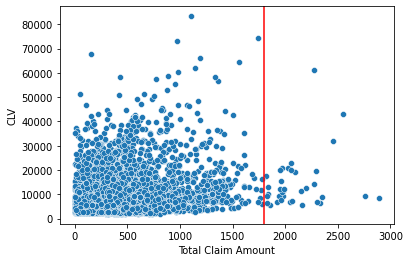

In [19]:
sns.scatterplot(df['Total Claim Amount'],df['CLV'])
plt.axvline(1800,color='r')

In [20]:
df[df['Total Claim Amount']>1800]['Total Claim Amount'].count()

36

In [21]:
print('Data point remain',len(df))

Data point remain 9134


<AxesSubplot:xlabel='Total Claim Amount', ylabel='Density'>

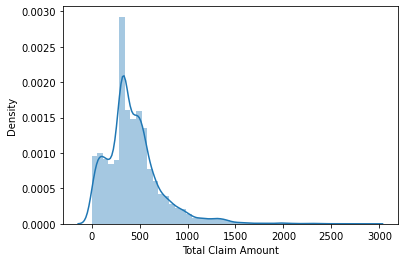

In [22]:
sns.distplot(df['Total Claim Amount'])

<AxesSubplot:xlabel='CLV', ylabel='Density'>

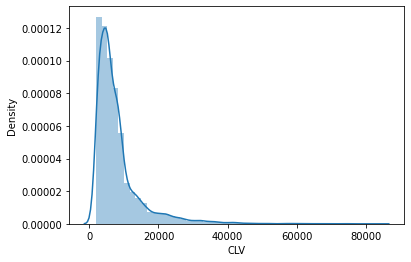

In [23]:
sns.distplot(df['CLV'])

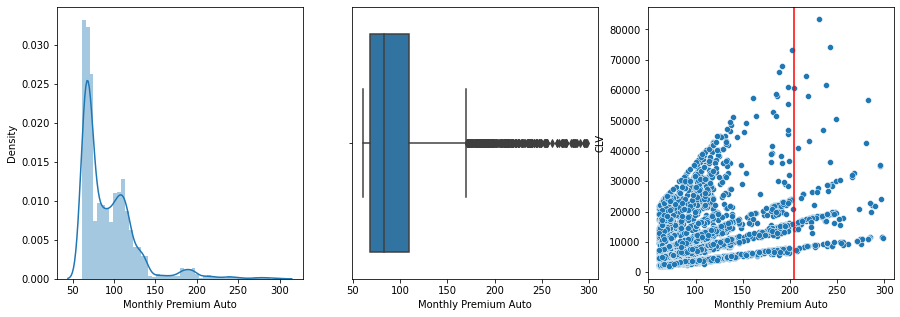

In [24]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['Monthly Premium Auto'],ax=ax[1])

sns.distplot(df['Monthly Premium Auto'],ax=ax[0])
sns.scatterplot(df['Monthly Premium Auto'],df['CLV'],ax=ax[2])
plt.axvline(204,color='r')

In [25]:
Upper_whiskers=df['Monthly Premium Auto'].quantile(0.75)+1.5*df['Monthly Premium Auto'].quantile(0.75)-df['Monthly Premium Auto'].quantile(0.25)
Upper_whiskers

204.5

In [26]:
df[df['Monthly Premium Auto']>204.5]['Monthly Premium Auto'].count()

154

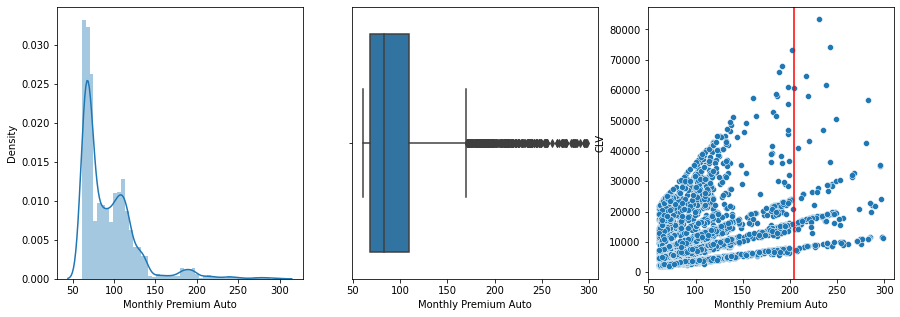

In [27]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.boxplot(df['Monthly Premium Auto'],ax=ax[1])

sns.distplot(df['Monthly Premium Auto'],ax=ax[0])
sns.scatterplot(df['Monthly Premium Auto'],df['CLV'],ax=ax[2])
plt.axvline(204,color='r')

In [28]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Customer                       9134 non-null   object        
 1   State                          9134 non-null   object        
 2   CLV                            9134 non-null   float64       
 3   Response                       9134 non-null   object        
 4   Coverage                       9134 non-null   object        
 5   Education                      9134 non-null   object        
 6   Effective To Date              9134 non-null   datetime64[ns]
 7   EmploymentStatus               9134 non-null   object        
 8   Gender                         9134 non-null   object        
 9   Income                         9134 non-null   int64         
 10  Location Code                  9134 non-null   object        
 11  Marital Status   

In [29]:
df['Months']=df['Effective To Date'].dt.month
df['Months'].value_counts()

1    4898
2    4236
Name: Months, dtype: int64

In [30]:
df['Months'] = df['Months'].astype('object',copy=False)
df['Number of Policies'] = np.where(df['Number of Policies']>2,3,df['Number of Policies'])
df['Number of Policies'].value_counts()

3    3589
1    3251
2    2294
Name: Number of Policies, dtype: int64

In [31]:
df['Number of Policies'] = df['Number of Policies'].astype('object',copy=False)
 
no=df[df['Response']=='No']['CLV']
yes=df[df['Response']=='Yes']['CLV']
import scipy.stats as stats
stats.mannwhitneyu(no,yes)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)

<AxesSubplot:xlabel='CLV'>

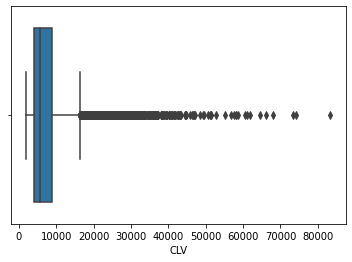

In [32]:
import matplotlib.pyplot as plt
sns.boxplot(df['CLV'])

In [33]:
df["CLV"].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: CLV, dtype: float64

In [34]:
q1=df['CLV'].quantile(0.25)
q2=df['CLV'].quantile(0.50)
q3=df['CLV'].quantile(0.75)
IQR=q3-q1
print(IQR)

4967.915247000001


In [35]:
l1=q3+1.5*IQR
l1

16414.039911750002

In [36]:
l2=q1-1.5*IQR
l2

-3457.6210762500014

In [37]:
df[df['CLV']>l1]['CLV'].count()

817

In [38]:
df[df['CLV']>l1].head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
8,DY87989,Oregon,24127.50402,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
22,YH23384,Arizona,24127.50402,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,...,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1
31,UL64533,Nevada,18975.45611,No,Extended,High School or Below,2011-01-22,Employed,M,65999,...,0,3,Corporate Auto,Corporate L2,Offer2,Agent,615.927769,Luxury SUV,Medsize,1
50,WE95729,Oregon,36707.42639,No,Basic,College,2011-01-17,Employed,M,24804,...,0,2,Personal Auto,Personal L2,Offer1,Agent,593.830288,SUV,Small,1
51,PY51963,California,33473.34946,Yes,Basic,Bachelor,2011-01-11,Employed,F,33190,...,0,2,Corporate Auto,Corporate L1,Offer1,Web,508.800000,SUV,Medsize,1


In [39]:
q1=df['CLV'].quantile(0.25)
q2=df['CLV'].quantile(0.75)
IQR=q2-q1
df=df[~((df['CLV']<(q1-1.5*IQR))|(df['CLV']>(q2+1.5*IQR)))]

In [40]:
df.shape

(8317, 25)

<AxesSubplot:xlabel='CLV'>

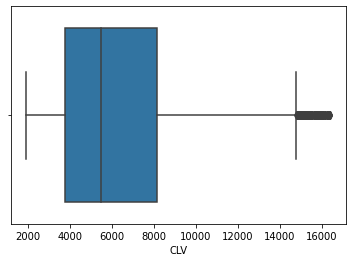

In [41]:
sns.boxplot(df['CLV'])

<AxesSubplot:xlabel='Coverage', ylabel='CLV'>

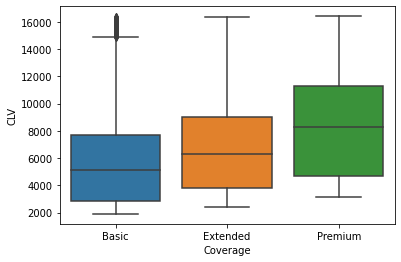

In [42]:
sns.boxplot(x=df['Coverage'],y=df['CLV'])

<AxesSubplot:xlabel='Income', ylabel='CLV'>

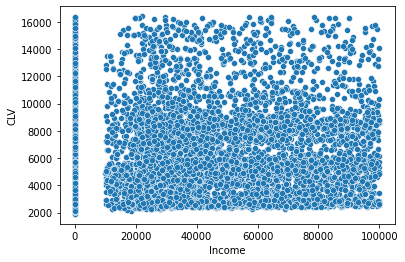

In [43]:
sns.scatterplot(y='CLV',x='Income',data=df)

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='CLV'>

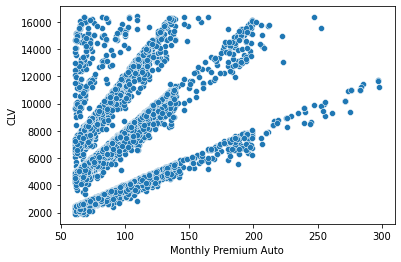

In [44]:
sns.scatterplot(y='CLV',x='Monthly Premium Auto',data=df)

<AxesSubplot:xlabel='Total Claim Amount', ylabel='CLV'>

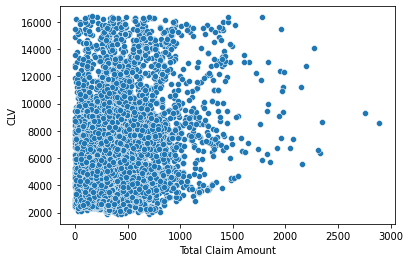

In [45]:
sns.scatterplot(y='CLV',x='Total Claim Amount',data=df)

In [46]:
df.corr()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
CLV,1.000000,0.041402,0.458173,-0.008670,-0.004105,0.239107
Income,0.041402,1.000000,-0.027477,-0.031282,0.002107,-0.368804
Monthly Premium Auto,0.458173,-0.027477,1.000000,0.003352,0.015991,0.607531
Months Since Last Claim,-0.008670,-0.031282,0.003352,1.000000,-0.045241,0.004844
Months Since Policy Inception,-0.004105,0.002107,0.015991,-0.045241,1.000000,-0.001050
Total Claim Amount,0.239107,-0.368804,0.607531,0.004844,-0.001050,1.000000


In [47]:
df.head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,3,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


<AxesSubplot:xlabel='CLV', ylabel='Density'>

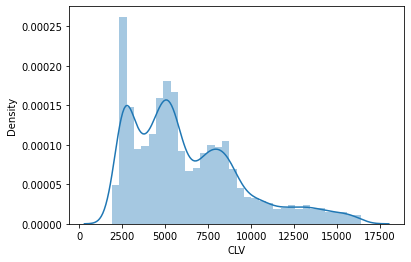

In [48]:
sns.distplot(df['CLV'])

In [49]:
df['State'].value_counts()

California    2869
Oregon        2368
Arizona       1565
Nevada         799
Washington     716
Name: State, dtype: int64

In [50]:
cl=df[df['State']=='California']['CLV']
org=df[df['State']=='Oregon']['CLV']
ar=df[df['State']=='Arizona']['CLV']
Nv=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']
 
a=stats.kruskal(cl,org,ar,Nv,Wa)

In [51]:
catg=df.select_dtypes(include=['object'])
catg.drop(['Customer'],1,inplace=True)
catg.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,3,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [52]:
col=list(catg.columns)
print(len(col))
col

17


['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Months']

In [53]:
for i in col:
    print(i,'\n',df[i].value_counts(),'\n')

State 
 California    2869
Oregon        2368
Arizona       1565
Nevada         799
Washington     716
Name: State, dtype: int64 

Response 
 No     7123
Yes    1194
Name: Response, dtype: int64 

Coverage 
 Basic       5132
Extended    2462
Premium      723
Name: Coverage, dtype: int64 

Education 
 Bachelor                2505
College                 2466
High School or Below    2359
Master                   671
Doctor                   316
Name: Education, dtype: int64 

EmploymentStatus 
 Employed         5173
Unemployed       2116
Medical Leave     397
Disabled          374
Retired           257
Name: EmploymentStatus, dtype: int64 

Gender 
 F    4214
M    4103
Name: Gender, dtype: int64 

Location Code 
 Suburban    5255
Rural       1616
Urban       1446
Name: Location Code, dtype: int64 

Marital Status 
 Married     4832
Single      2260
Divorced    1225
Name: Marital Status, dtype: int64 

Number of Open Complaints 
 0    6590
1     913
2     340
3     274
4     145
5      55

In [54]:
ttest=[]
anova=[]
for i in col:
    if len(df[i].unique())<3:
        ttest.append(i)
    else:
        anova.append(i)

print(ttest)
print(anova)

['Response', 'Gender', 'Months']
['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']


In [55]:
df1=df.iloc[1:1670,:]
df1.shape
print(stats.shapiro(df1['CLV']))

ShapiroResult(statistic=0.9224913120269775, pvalue=1.7656668137012117e-28)


In [56]:
num=df.select_dtypes(exclude=['object'])
num.columns

Index(['CLV', 'Effective To Date', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Total Claim Amount'],
      dtype='object')

In [57]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']
b=stats.mannwhitneyu(yes,no)
b[1]
female=df[df['Gender']=='F']['CLV']
male=df[df['Gender']=='M']['CLV']
f=stats.mannwhitneyu(female,male)

In [58]:
anova

['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [59]:
df["State"].value_counts()

California    2869
Oregon        2368
Arizona       1565
Nevada         799
Washington     716
Name: State, dtype: int64

In [60]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']
stats.kruskal(ca,Or,Ar,Ne,Wa)

KruskalResult(statistic=10.295703141573593, pvalue=0.035730561639361925)

In [61]:
df["Coverage"].value_counts()

Basic       5132
Extended    2462
Premium      723
Name: Coverage, dtype: int64

In [62]:
df["Coverage"].value_counts()

Basic       5132
Extended    2462
Premium      723
Name: Coverage, dtype: int64

In [63]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']
c=stats.kruskal(Ba,Ex,Pr)
df['Education'].value_counts()

Bachelor                2505
College                 2466
High School or Below    2359
Master                   671
Doctor                   316
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='CLV'>

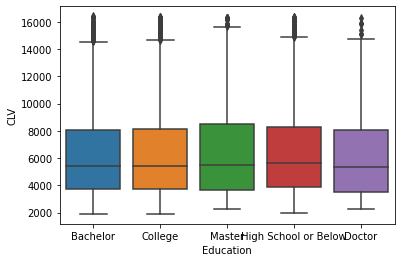

In [64]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']
d=stats.kruskal(Ba,Co,Hi,Ma,Da)
sns.boxplot(y='CLV',x='Education',data=df)

In [65]:
df["EmploymentStatus"].value_counts()

Employed         5173
Unemployed       2116
Medical Leave     397
Disabled          374
Retired           257
Name: EmploymentStatus, dtype: int64

In [66]:
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']
e=stats.kruskal(Ba,Co,Hi,Ma,Da)

In [67]:
df["Location Code"].value_counts()

Suburban    5255
Rural       1616
Urban       1446
Name: Location Code, dtype: int64

In [68]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']
g=stats.kruskal(Ba,Co,Hi)

In [69]:
df["Marital Status"].value_counts()

Married     4832
Single      2260
Divorced    1225
Name: Marital Status, dtype: int64

In [70]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']
h=stats.kruskal(Ba,Co,Hi)

In [71]:
df["Number of Open Complaints"].value_counts()

0    6590
1     913
2     340
3     274
4     145
5      55
Name: Number of Open Complaints, dtype: int64

In [72]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']
i=stats.kruskal(Ba,Co,Hi,Ma,Da,As)

In [73]:
df["Number of Policies"].value_counts()

3    3542
1    3251
2    1524
Name: Number of Policies, dtype: int64

In [74]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']
j=stats.kruskal(Ba,Co,Hi)

In [75]:
df["Policy"].value_counts()

Personal L3     3121
Personal L2     1932
Personal L1     1137
Corporate L3     928
Corporate L2     550
Corporate L1     317
Special L2       148
Special L3       127
Special L1        57
Name: Policy, dtype: int64

In [76]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']
k=stats.kruskal(Ba,Co,Hi)

In [77]:
df["Policy"].value_counts()

Personal L3     3121
Personal L2     1932
Personal L1     1137
Corporate L3     928
Corporate L2     550
Corporate L1     317
Special L2       148
Special L3       127
Special L1        57
Name: Policy, dtype: int64

In [78]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']
l=stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)

In [79]:
df["Renew Offer Type"].value_counts()

Offer1    3383
Offer2    2697
Offer3    1291
Offer4     946
Name: Renew Offer Type, dtype: int64

In [80]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']
m=stats.kruskal(Ba,Co,Hi,Ma)

In [81]:
df["Sales Channel"].value_counts()

Agent          3175
Branch         2319
Call Center    1612
Web            1211
Name: Sales Channel, dtype: int64

In [82]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']
n=stats.kruskal(Ba,Co,Hi,Ma)
anova

['State',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [83]:
df['Vehicle Class'].value_counts()

Four-Door Car    4331
Two-Door Car     1763
SUV              1584
Sports Car        418
Luxury SUV        115
Luxury Car        106
Name: Vehicle Class, dtype: int64

In [84]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']
o=stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)

In [85]:
df["Vehicle Size"].value_counts()

Medsize    5848
Small      1598
Large       871
Name: Vehicle Size, dtype: int64

In [86]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']
p=stats.kruskal(Ba,Co,Hi)

In [87]:
df["Months"].value_counts()

1    4455
2    3862
Name: Months, dtype: int64

In [88]:
Ba=df[df['Months']==1]['CLV']
Co=df[df['Months']==2]['CLV']
q=stats.kruskal(Ba,Co)
q

KruskalResult(statistic=0.09788212023068232, pvalue=0.7543861291125179)

In [89]:
z=[a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1],q[1]]
print(len(z))
z

17


[0.035730561639361925,
 0.5941025486726714,
 7.821727713303398e-116,
 0.10427601190574867,
 1.3835894278665588e-09,
 0.7217021786222257,
 0.11544985245913697,
 9.110727305285051e-06,
 0.005742808668344202,
 0.0,
 0.43150531931619074,
 0.8967251030839369,
 3.260041570637199e-37,
 0.12876900765780802,
 1.3755909360461434e-238,
 0.01320199489336352,
 0.7543861291125179]

In [90]:
print(len(col))
col

17


['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Months']

In [91]:
df2=pd.DataFrame({'columns':col,'P_vlaue':z})
df2

,columns,P_vlaue
0,State,3.573056e-02
1,Response,5.941025e-01
2,Coverage,7.821728e-116
3,Education,1.042760e-01
4,EmploymentStatus,1.383589e-09
5,Gender,7.217022e-01
6,Location Code,1.154499e-01
7,Marital Status,9.110727e-06
8,Number of Open Complaints,5.742809e-03
9,Number of Policies,0.000000e+00


In [92]:
df2['status']=df2['P_vlaue'].map(lambda x:'significant' if x<0.05 else 'not significant')
df2

,columns,P_vlaue,status
0,State,3.573056e-02,significant
1,Response,5.941025e-01,not significant
2,Coverage,7.821728e-116,significant
3,Education,1.042760e-01,not significant
4,EmploymentStatus,1.383589e-09,significant
5,Gender,7.217022e-01,not significant
6,Location Code,1.154499e-01,not significant
7,Marital Status,9.110727e-06,significant
8,Number of Open Complaints,5.742809e-03,significant
9,Number of Policies,0.000000e+00,significant


<AxesSubplot:xlabel='State', ylabel='CLV'>

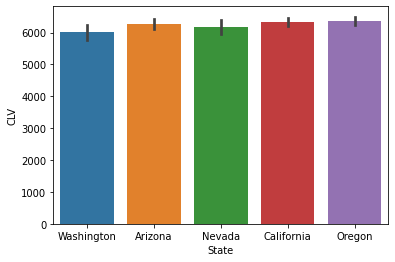

In [93]:
sns.barplot(df['State'],df['CLV'])

<AxesSubplot:xlabel='Response', ylabel='CLV'>

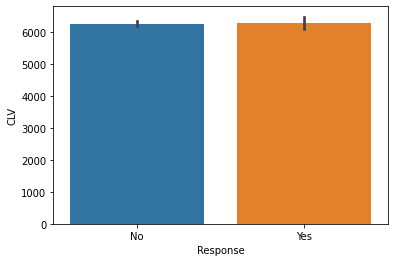

In [94]:
sns.barplot(df['Response'],df['CLV'])

<AxesSubplot:xlabel='Gender', ylabel='CLV'>

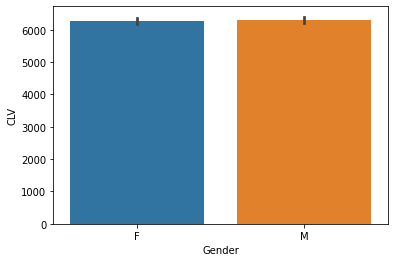

In [95]:
sns.barplot(df['Gender'],df['CLV'])

<AxesSubplot:xlabel='Location Code', ylabel='CLV'>

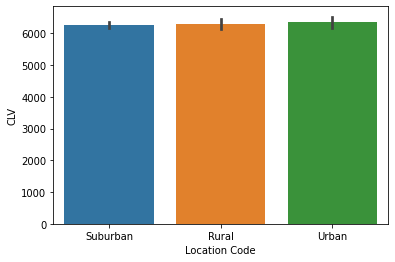

In [96]:
sns.barplot(df['Location Code'],df['CLV'])

<AxesSubplot:xlabel='Policy Type', ylabel='CLV'>

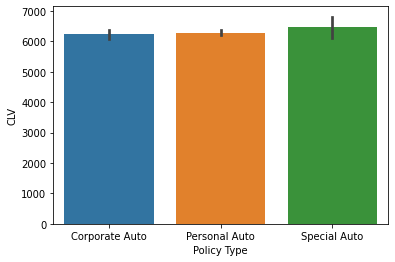

In [97]:
sns.barplot(df['Policy Type'],df['CLV'])

<AxesSubplot:xlabel='Policy', ylabel='CLV'>

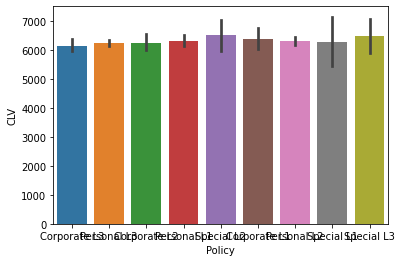

In [98]:
sns.barplot(df['Policy'],df['CLV'])

<AxesSubplot:xlabel='Renew Offer Type', ylabel='CLV'>

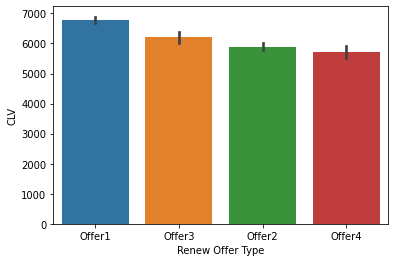

In [99]:
sns.barplot(df['Renew Offer Type'],df['CLV'])

<AxesSubplot:xlabel='Months', ylabel='CLV'>

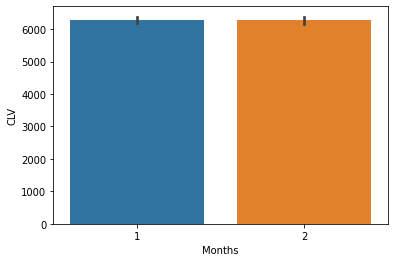

In [100]:
sns.barplot(df['Months'],df['CLV'])

In [101]:
num=df.select_dtypes(exclude=['object'])
num=num.drop('Effective To Date',1)
num.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [102]:
num=df.select_dtypes(exclude=['object'])
num=num.drop('Effective To Date',1)
num.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [103]:
X=num.drop(['CLV'],axis=1)
y=num['CLV']
lin_reg=sm.OLS(y,X).fit()
lin_reg.summary()   

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CLV   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.831
Method:                 Least Squares   F-statistic:                              8154.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:04:47   Log-Likelihood:                         -78131.
No. Observations:                8317   AIC:                                  1.563e+05
Df Residuals:                    8312   BIC:                                  1.563e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Income                            0.0098      0.001      8.844      0.000       0.008       0.012
Monthly Premium Auto             59.8190      1.168     51.210      0.000      57.529      62.109
Months Since Last Claim          14.5607      2.926      4.976      0.000       8.824      20.297
Months Since Policy Inception     5.4229      1.035      5.240      0.000       3.394       7.451
Total Claim Amount               -0.2779      0.162     -1.716      0.086      -0.595       0.040
==============================================================================
Omnibus:                      785.505   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1063.406
Skew:                           0.780   Prob(JB):                    1.21e-231
Kurtosis:                       3.797   Cond. No.                     4.47e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
a={'Numerical_column':['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Total Claim Amount'],
  'P_value':[0.011,0.000,0.102,0.483,0.057],'Status':['Significant','Significant','Not_Significant','Not_Significant','Significant']}
m=pd.DataFrame(a)
m

,Numerical_column,P_value,Status
0,Income,0.011,Significant
1,Monthly Premium Auto,0.000,Significant
2,Months Since Last Claim,0.102,Not_Significant
3,Months Since Policy Inception,0.483,Not_Significant
4,Total Claim Amount,0.057,Significant


In [105]:
num.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [106]:
catg=df.select_dtypes(include=['object'])
catg=catg.drop('Customer',1)
catg.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,3,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [107]:
df1=pd.concat([catg,num],axis=1)
df.head()

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Months
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,0,3,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [108]:
catg=pd.get_dummies(catg,drop_first=True)
catg.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Months_2
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [109]:
df=pd.concat([catg,num],axis=1)
df.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Months_2,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,2763.519279,56274,69,32,5,384.811147
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,6979.535903,0,94,13,42,1131.464935
2,0,1,0,0,0,0,1,0,0,0,...,1,1,0,1,12887.431650,48767,108,18,38,566.472247
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,7645.861827,0,106,18,65,529.881344
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,2813.692575,43836,73,12,44,138.130879


In [110]:
X=df.drop(['CLV'],axis=1)
y=num['CLV']
xc=sm.add_constant(X)
lin_reg=sm.OLS(y,xc).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1388.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:04:48   Log-Likelihood:                -69425.
No. Observations:                8317   AIC:                         1.390e+05
Df Residuals:                    8262   BIC:                         1.393e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1444.7255    160.855     -8.982      0.000   -1760.042   -1129.409
State_California                  27.6793     32.302      0.857      0.392     -35.641      91.000
State_Nevada                      13.5427     44.694      0.303      0.762     -74.068     101.153
State_Oregon                      36.3548     33.453      1.087      0.277     -29.221     101.930
State_Washington                  28.3564     46.355      0.612      0.541     -62.510     119.223
Response_Yes                     -59.6290     35.541     -1.678      0.093    -129.299      10.041
Coverage_Extended                308.9133     43.930      7.032      0.000     222.799     395.028
Coverage_Premium                 617.8540     93.421      6.614      0.000     434.725     800.983
Education_College                 58.3666     29.214      1.998      0.046       1.099     115.634
Education_Doctor                 214.3894     61.733      3.473      0.001      93.376     335.402
Education_High School or Below    59.5221     29.715      2.003      0.045       1.273     117.771
Education_Master                 246.2266     45.087      5.461      0.000     157.845     334.608
EmploymentStatus_Employed        249.1800     60.435      4.123      0.000     130.712     367.648
EmploymentStatus_Medical Leave   158.0006     74.268      2.127      0.033      12.416     303.585
EmploymentStatus_Retired          29.9993     85.980      0.349      0.727    -138.544     198.542
EmploymentStatus_Unemployed      -98.3936     60.987     -1.613      0.107    -217.943      21.155
Gender_M                         -84.0956     22.755     -3.696      0.000    -128.701     -39.490
Location Code_Suburban            80.7035     45.432      1.776      0.076      -8.355     169.762
Location Code_Urban               72.9616     41.445      1.760      0.078      -8.281     154.204
Marital Status_Married           100.3937     33.608      2.987      0.003      34.513     166.274
Marital Status_Single            -58.4802     38.962     -1.501      0.133    -134.855      17.894
Number of Open Complaints_1      -62.2471     36.511     -1.705      0.088    -133.817       9.323
Number of Open Complaints_2     -140.5411     57.372     -2.450      0.014    -253.004     -28.078
Number of Open Complaints_3     -327.6759     63.430     -5.166      0.000    -452.015    -203.337
Number of Open Complaints_4     -427.6933     86.372     -4.952      0.000    -597.004    -258.383
Number of Open Complaints_5     -546.9332    139.308     -3.926      0.000    -820.012    -273.855
Number of Policies_2            7427.7036     32.297    229.982      0.000    7364.394    7491.014
Number of Policies_3            3508.2599     25.323    138.541      0.000    3458.621    3557.899
Policy Type_Pe

In [111]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)

(0.9256996533993653, 0.9934470525543633)

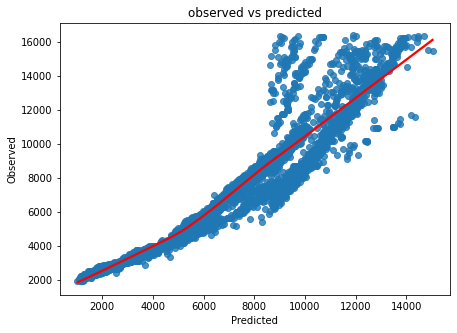

In [112]:
y_pred=lin_reg.predict()

fig,ax=plt.subplots(figsize=(7,5))
sns.regplot(x=y_pred,y=y,lowess=True,line_kws={'color':'red'})
ax.set_title('observed vs predicted')
ax.set(xlabel='Predicted',ylabel='Observed')
plt.show()

In [113]:
residuals = y_pred-y
mean_of_residuals = np.mean(residuals)
print(f"The mean of the residuals is {mean_of_residuals}")

The mean of the residuals is 2.7142350014140538e-08


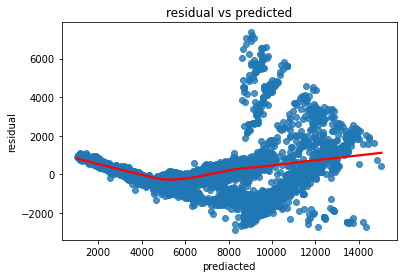

(0.9397858564988676, 0.976640434225694, 'increasing')

In [114]:
y_pred=lin_reg.predict()
resids=lin_reg.resid
fig,ax=plt.subplots()
sns.regplot(y_pred,resids,lowess=True,line_kws={'color':'red'})  ## lowess kind of linear rerrg.
ax.set_title('residual vs predicted')
ax.set(xlabel='prediacted',ylabel='residual')
plt.show()

import statsmodels.stats.api as sms
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

Jarque_beraResult(statistic=35761.98903788383, pvalue=0.0)


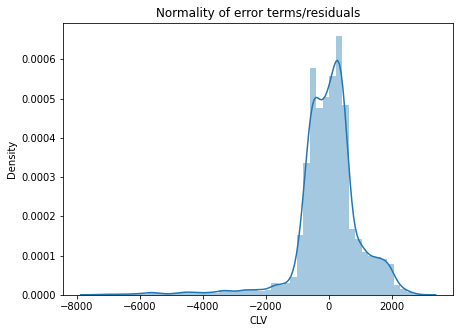

In [115]:
plt.figure(figsize=(7,5))
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

In [116]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(lin_reg.resid)

2.0168338923970794

<Figure size 504x360 with 0 Axes>

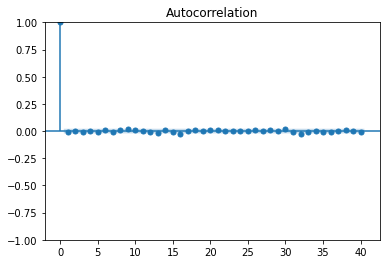

In [117]:
import statsmodels.tsa.api as smt
plt.figure(figsize=(7,5))
acf=smt.graphics.plot_acf(lin_reg.resid,lags=40)

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
a=pd.DataFrame({'vif': vif}, index=X.columns)
a

,vif
State_California,2.809912
State_Nevada,1.507964
State_Oregon,2.491722
State_Washington,1.454761
Response_Yes,1.435108
Coverage_Extended,3.049340
Coverage_Premium,3.552023
Education_College,1.992865
Education_Doctor,1.146226
Education_High School or Below,1.974457


In [119]:
df.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Months_2,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,2763.519279,56274,69,32,5,384.811147
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,6979.535903,0,94,13,42,1131.464935
2,0,1,0,0,0,0,1,0,0,0,...,1,1,0,1,12887.431650,48767,108,18,38,566.472247
3,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,7645.861827,0,106,18,65,529.881344
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,2813.692575,43836,73,12,44,138.130879


In [120]:
df.shape

(8317, 57)

In [121]:
X=df.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2',
'Policy_Personal L3',
'Policy_Special L1',
'Policy_Special L2',
'Policy_Special L3',],axis=1)
y=df['CLV']
lin_reg=sm.OLS(y,X).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    CLV   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              7979.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):                        0.00
Time:                        17:05:00   Log-Likelihood:                         -69476.
No. Observations:                8317   AIC:                                  1.390e+05
Df Residuals:                    8269   BIC:                                  1.394e+05
Df Model:                          48                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
State_California                  -9.9214     32.191     -0.308      0.758     -73.023      53.180
State_Nevada                     -30.7997     44.713     -0.689      0.491    -118.448      56.848
State_Oregon                      -5.3345     33.367     -0.160      0.873     -70.742      60.073
State_Washington                 -11.2241     46.402     -0.242      0.809    -102.183      79.735
Response_Yes                     -74.7583     35.699     -2.094      0.036    -144.737      -4.780
Coverage_Extended                575.0419     35.148     16.361      0.000     506.143     643.941
Coverage_Premium                1256.2809     68.742     18.275      0.000    1121.528    1391.033
Education_College                 33.1109     29.265      1.131      0.258     -24.257      90.479
Education_Doctor                 181.9271     61.992      2.935      0.003      60.408     303.446
Education_High School or Below    37.0404     29.796      1.243      0.214     -21.367      95.448
Education_Master                 210.7688     45.204      4.663      0.000     122.157     299.381
EmploymentStatus_Employed         86.9157     58.564      1.484      0.138     -27.885     201.716
EmploymentStatus_Medical Leave   -19.8979     72.518     -0.274      0.784    -162.052     122.256
EmploymentStatus_Retired        -163.7142     84.244     -1.943      0.052    -328.853       1.425
EmploymentStatus_Unemployed     -301.4511     57.838     -5.212      0.000    -414.829    -188.074
Gender_M                         -97.7768     22.842     -4.281      0.000    -142.554     -53.000
Location Code_Suburban           -41.7121     44.000     -0.948      0.343    -127.962      44.538
Location Code_Urban               -6.3485     40.905     -0.155      0.877     -86.533      73.835
Marital Status_Married            45.1364     33.336      1.354      0.176     -20.211     110.484
Marital Status_Single           -117.1620     38.714     -3.026      0.002    -193.051     -41.273
Number of Open Complaints_1      -68.6324     36.710     -1.870      0.062    -140.594       3.329
Number of Open Complaints_2     -167.3891     57.640     -2.904      0.004    -280.379     -54.399
Number of Open Complaints_3     -330.6117     63.790     -5.183      0.000    -455.656    -205.568
Number of Open Complaints_4     -434.2481     86.835     -5.001      0.000    -604.467    -264.029
Number of Open Complaints_5     -514.8260    140.040     -3.676      0.000    -789.339    -240.313
Number of Policies_2            7391.7713     32.274    229.034      0.000    7328.507    7455.036
Number of Policies_3            3482.6479     25.331    137.485      0.000    3432.993    3532.303
Policy_Corpora

<AxesSubplot:xlabel='CLV', ylabel='Density'>

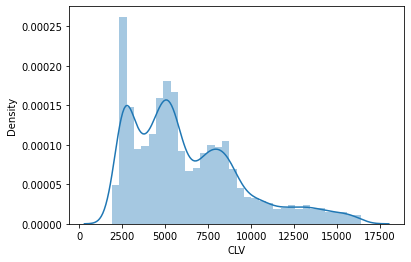

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
sns.distplot(df['CLV'])

<AxesSubplot:xlabel='CLV', ylabel='Density'>

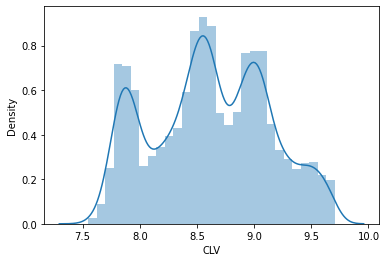

In [123]:
a=np.log(df['CLV'])
sns.distplot(a)

0       0.000362
1       0.000143
2       0.000078
3       0.000131
4       0.000355
          ...   
9128    0.000244
9130    0.000323
9131    0.000122
9132    0.000133
9133    0.000383
Name: CLV, Length: 8317, dtype: float64

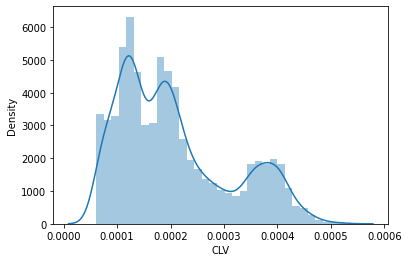

In [124]:
b = df['CLV'].transform(lambda X: 1/X)
sns.distplot(b)
b

<AxesSubplot:xlabel='CLV', ylabel='Density'>

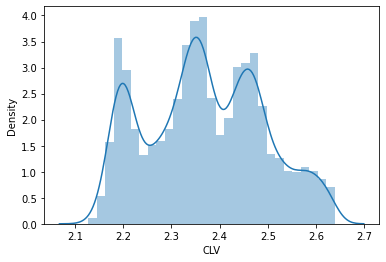

In [125]:
b = df['CLV'].transform(lambda X:X**0.10)
sns.distplot(b)

<AxesSubplot:xlabel='Monthly Premium Auto'>

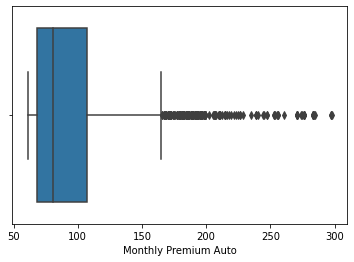

In [126]:
sns.boxplot(df['Monthly Premium Auto'])

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

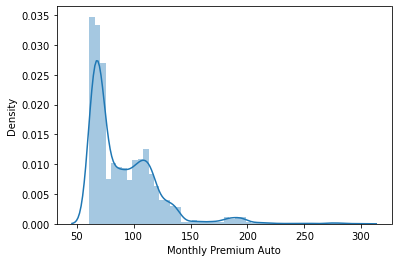

In [127]:
sns.distplot(df['Monthly Premium Auto'])

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

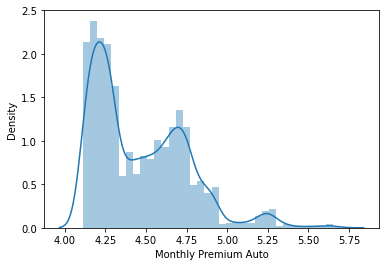

In [128]:
a=np.log(df['Monthly Premium Auto'])
sns.distplot(a)

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

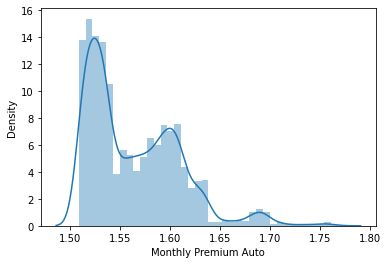

In [129]:
b = df['Monthly Premium Auto'].transform(lambda X:X**0.1)
sns.distplot(b)

In [130]:
X=df.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],1)
y=df['CLV']          
y =np.log(y)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)
print('-----Log---- ')
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 
print('After Anti Log')
print('RMSE : ',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
print('r2_score : ',r2_score(np.exp(y_test),np.exp(y_pred)))

-----Log---- 
RMES: 0.08821718139816123
R-squared: 0.9703049860931885
After Anti Log
RMSE :  927.6745346914278
r2_score :  0.9192803750936033


In [131]:
print('After Anti Log')
print('RMSE : ',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred))))
print('r2_score : ',r2_score(np.exp(y_test),np.exp(y_pred)))

After Anti Log
RMSE :  927.6745346914278
r2_score :  0.9192803750936033


In [132]:
y_pred_train=lr.predict(x_train)
print('RMES:',np.sqrt(mean_squared_error(y_train,y_pred_train)))
print('R-squared:',r2_score(y_train,y_pred_train)) 

RMES: 0.08782756409420661
R-squared: 0.9705746133438757


In [133]:
X.head()

,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,...,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small,Months_2,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,56274,69,32,5,384.811147
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,94,13,42,1131.464935
2,0,1,0,0,0,0,1,0,0,0,...,0,1,1,0,1,48767,108,18,38,566.472247
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,106,18,65,529.881344
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,43836,73,12,44,138.130879


In [140]:
df1.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,...,Sales Channel,Vehicle Class,Vehicle Size,Months,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,...,Agent,Two-Door Car,Medsize,2,2763.519279,56274,69,32,5,384.811147
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,3,...,Agent,Four-Door Car,Medsize,1,6979.535903,0,94,13,42,1131.464935
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,...,Agent,Two-Door Car,Medsize,2,12887.431650,48767,108,18,38,566.472247
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,3,...,Call Center,SUV,Medsize,1,7645.861827,0,106,18,65,529.881344
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,...,Agent,Four-Door Car,Medsize,2,2813.692575,43836,73,12,44,138.130879


In [141]:
catg=df1.select_dtypes(include=['object'])
catg.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,3,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,3,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [142]:
num1=df1.select_dtypes(exclude=['object'])
num1.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [143]:
from sklearn.preprocessing import LabelEncoder
cat=catg.apply(LabelEncoder().fit_transform)
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,4,0,0,0,1,0,1,1,0,0,0,2,0,0,5,1,1
1,0,0,1,0,4,0,1,2,0,2,1,5,2,0,0,1,0
2,2,0,2,0,1,0,1,1,0,1,1,5,0,0,5,1,1
3,1,0,0,0,4,1,1,1,0,2,0,1,0,2,3,1,0
4,4,0,0,0,1,1,0,2,0,0,1,3,0,0,0,1,1


In [144]:
df1=pd.concat([cat,num1],axis=1)
df1.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,...,Sales Channel,Vehicle Class,Vehicle Size,Months,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,4,0,0,0,1,0,1,1,0,0,...,0,5,1,1,2763.519279,56274,69,32,5,384.811147
1,0,0,1,0,4,0,1,2,0,2,...,0,0,1,0,6979.535903,0,94,13,42,1131.464935
2,2,0,2,0,1,0,1,1,0,1,...,0,5,1,1,12887.431650,48767,108,18,38,566.472247
3,1,0,0,0,4,1,1,1,0,2,...,2,3,1,0,7645.861827,0,106,18,65,529.881344
4,4,0,0,0,1,1,0,2,0,0,...,0,0,1,1,2813.692575,43836,73,12,44,138.130879


In [145]:
X=df1.drop(['CLV','State','Response','Gender','Location Code','Policy Type','Months','Policy','Renew Offer Type','Months Since Policy Inception'],1)
y=df1['CLV']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)


y_pred=dt.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

RMES: 1142.298186182458
R-squared: 0.8776097450792665


In [146]:
from scipy.stats import zscore

num2=num1.apply(zscore)
num2.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,-1.085002,0.612738,-0.707014,1.690097,-1.542454,-0.138687
1,0.216144,-1.237558,0.098255,-0.202664,-0.217172,2.569937
2,2.039439,0.365907,0.549205,0.295431,-0.360446,0.520322
3,0.421786,-1.237558,0.484784,0.295431,0.606653,0.387582
4,-1.069518,0.203775,-0.578171,-0.302283,-0.145535,-1.033565


<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Density'>

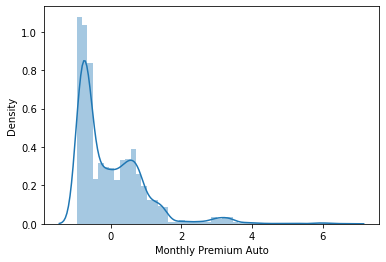

In [147]:
sns.distplot(num2['Monthly Premium Auto'])

In [148]:
df2=pd.concat([cat,num2],axis=1)
df2.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,...,Sales Channel,Vehicle Class,Vehicle Size,Months,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,4,0,0,0,1,0,1,1,0,0,...,0,5,1,1,-1.085002,0.612738,-0.707014,1.690097,-1.542454,-0.138687
1,0,0,1,0,4,0,1,2,0,2,...,0,0,1,0,0.216144,-1.237558,0.098255,-0.202664,-0.217172,2.569937
2,2,0,2,0,1,0,1,1,0,1,...,0,5,1,1,2.039439,0.365907,0.549205,0.295431,-0.360446,0.520322
3,1,0,0,0,4,1,1,1,0,2,...,2,3,1,0,0.421786,-1.237558,0.484784,0.295431,0.606653,0.387582
4,4,0,0,0,1,1,0,2,0,0,...,0,0,1,1,-1.069518,0.203775,-0.578171,-0.302283,-0.145535,-1.033565


In [149]:
X=df2.drop(['CLV','State','Response','Gender','Location Code','Policy Type','Months'],1)
y=df2['CLV']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred=dt.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

RMES: 0.3499614230192032
R-squared: 0.8793908348871731


In [150]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

RMES: 0.26539441925028745
R-squared: 0.9306376919427841


In [152]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],
        
        'n_estimators' : [100,200,50],
        
        "bootstrap" : [True, False],
    
        'max_features': ['auto', 'sqrt', 'log2']
        
        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(x_train,y_train)
grid.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 200}

In [153]:
rf = RandomForestRegressor(bootstrap= True,max_depth= 30,max_features= 'auto',n_estimators= 300)

rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred)) 

RMES: 0.266615682335792
R-squared: 0.9299978553527447


In [154]:
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor 
br = BaggingRegressor()

br.fit(x_train,y_train)

y_pred=br.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

RMES: 0.26929870336686906
R-squared: 0.928581867735089


In [155]:
br = GradientBoostingRegressor(learning_rate=0.1,n_estimators=200)

br.fit(x_train,y_train)

y_pred=br.predict(x_test)
print('RMES:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R-squared:',r2_score(y_test,y_pred))

RMES: 0.26215683392893824
R-squared: 0.9323196913754561


In [ ]:
X=df1.drop(['CLV','State','Response','Gender','Location Code','Policy'],axis=1)
y=df1['CLV']
lin_reg=sm.OLS(y,X).fit()
lin_reg.summary()

In [156]:
num1.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [157]:
num3=num1[['Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception','Total Claim Amount','CLV']]
num3.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,CLV
0,56274,69,32,5,384.811147,2763.519279
1,0,94,13,42,1131.464935,6979.535903
2,48767,108,18,38,566.472247,12887.431650
3,0,106,18,65,529.881344,7645.861827
4,43836,73,12,44,138.130879,2813.692575


In [158]:
cat.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Months
0,4,0,0,0,1,0,1,1,0,0,0,2,0,0,5,1,1
1,0,0,1,0,4,0,1,2,0,2,1,5,2,0,0,1,0
2,2,0,2,0,1,0,1,1,0,1,1,5,0,0,5,1,1
3,1,0,0,0,4,1,1,1,0,2,0,1,0,2,3,1,0
4,4,0,0,0,1,1,0,2,0,0,1,3,0,0,0,1,1


In [159]:
df4=pd.concat([cat,num3],axis=1)
df4.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Number of Open Complaints,Number of Policies,...,Sales Channel,Vehicle Class,Vehicle Size,Months,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,CLV
0,4,0,0,0,1,0,1,1,0,0,...,0,5,1,1,56274,69,32,5,384.811147,2763.519279
1,0,0,1,0,4,0,1,2,0,2,...,0,0,1,0,0,94,13,42,1131.464935,6979.535903
2,2,0,2,0,1,0,1,1,0,1,...,0,5,1,1,48767,108,18,38,566.472247,12887.431650
3,1,0,0,0,4,1,1,1,0,2,...,2,3,1,0,0,106,18,65,529.881344,7645.861827
4,4,0,0,0,1,1,0,2,0,0,...,0,0,1,1,43836,73,12,44,138.130879,2813.692575
